<a href="https://colab.research.google.com/github/Sneha14114/SCT_DataScience_1st-task/blob/main/task_3_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/bank-full.csv', sep=';')
print(data.head())
print(data['y'].value_counts())
print(data.info())
print(data.describe())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
y
no     39922
yes     5289
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 e

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data=pd.read_csv('/content/bank-full.csv', sep=';')

# Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'y']
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Encode target variable
data_encoded['y'] = data_encoded['y'].map({'yes': 1, 'no': 0})

# Features and target
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.65      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

Confusion Matrix:
[[11665   301]
 [ 1043   555]]


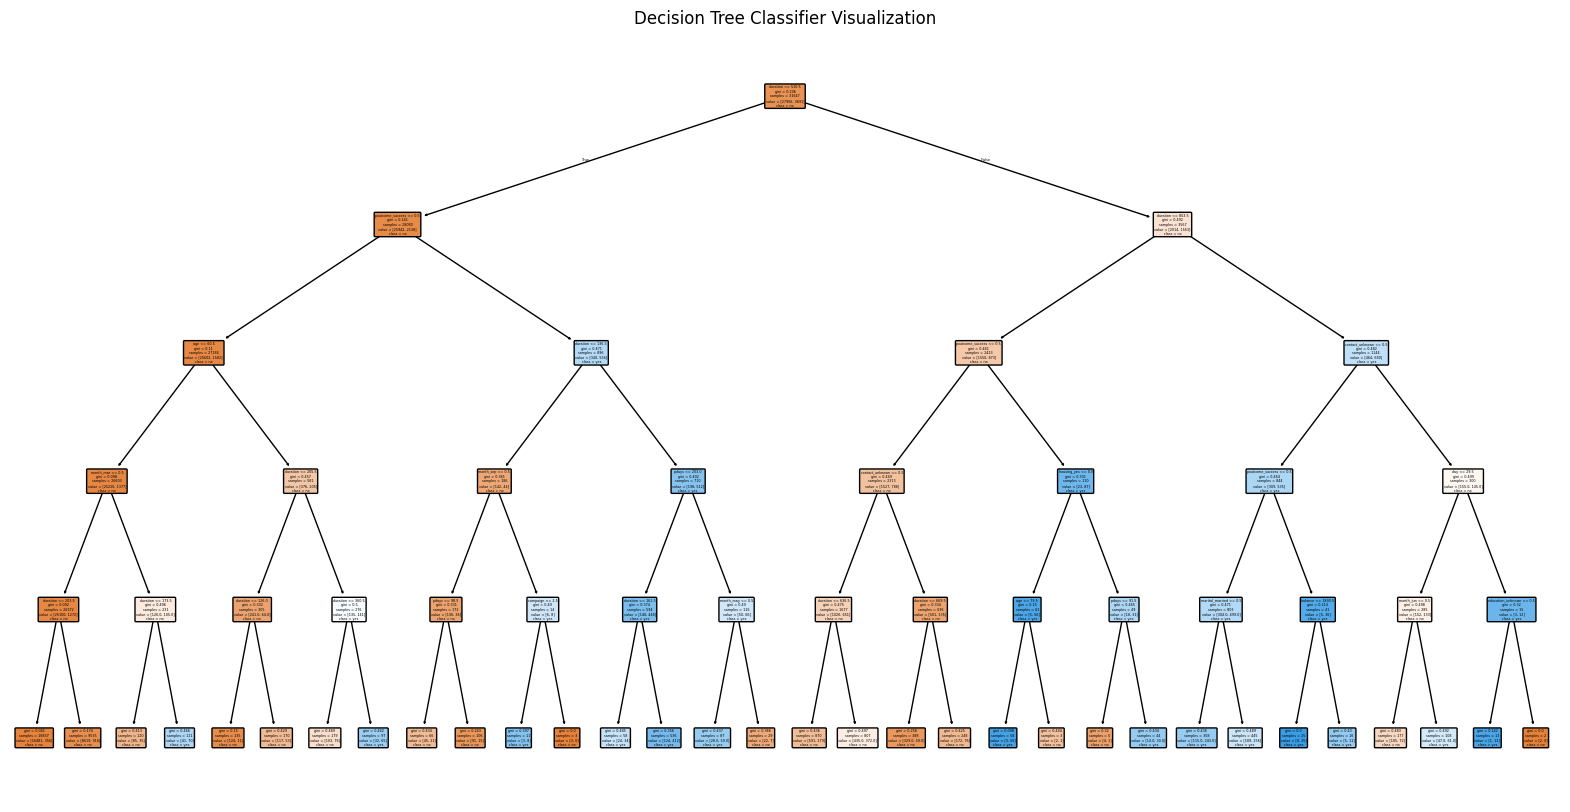

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.title("Decision Tree Classifier Visualization")
plt.show()